In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


In [2]:
df1 = pd.read_csv('sales.csv')
df2 = pd.read_csv('store.csv')

C:\Users\prati\AppData\Local\Temp\ipykernel_2640\3892853943.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('sales.csv')


### Checking the data frames

In [3]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
print(df1.columns)
print(df2.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')
Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


### Joining or merging the data sets on basis of the column 'store' 

In [8]:
df3 = pd.merge(df1,df2,on='Store')

In [9]:
df3.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
590252,648,6,2013-10-19,5686,575,1,0,0,0,d,a,2130.0,12.0,2008.0,0,NaN,NaN,NaN
725888,797,2,2014-02-18,4278,404,1,1,0,0,a,a,2090.0,10.0,2012.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
84084,92,5,2013-01-04,4934,513,1,0,0,1,c,a,240.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
662141,728,1,2015-03-30,8006,569,1,1,0,1,d,a,13990.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
121729,134,4,2014-03-27,4033,472,1,0,0,0,a,a,1200.0,9.0,2008.0,0,NaN,NaN,NaN


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

### Checking data for feratures with Nulls 

<AxesSubplot:>

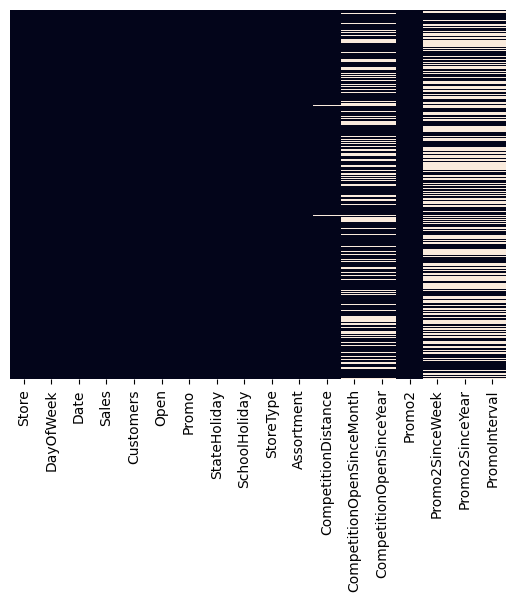

In [11]:
sns.heatmap(df3.isnull(),yticklabels= False, cbar= False)

In [12]:
df3.shape

(1017209, 18)

In [13]:
df3.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [14]:
df3.shape

(1017209, 18)

In [15]:
#CompetitionDistance

df3.loc[df3['CompetitionDistance'].isnull(),'CompetitionDistance'] = 0

In [16]:
#CompetitionOpenSinceMonth

df3.loc[df3['CompetitionOpenSinceMonth'].isnull(),'CompetitionOpenSinceMonth'] = 0

In [17]:
#CompetitionOpenSinceYear

df3.loc[df3['CompetitionOpenSinceYear'].isnull(),'CompetitionOpenSinceYear'] = 0

In [18]:
df3.Date = pd.to_datetime(df3.Date)

In [19]:
df3['Date'].min()

Timestamp('2013-01-01 00:00:00')

In [20]:
df3['Year'] = df3['Date'].dt.year
df3['Month'] = df3['Date'].dt.month
df3['Day'] = df3['Date'].dt.day

### Dropping the colomns that either have too many nulls or are not required for analysis

In [21]:
df3.drop(['Store','Customers','Promo2SinceWeek','Promo2SinceYear','PromoInterval','Date'],inplace= True, axis =1)

<AxesSubplot:>

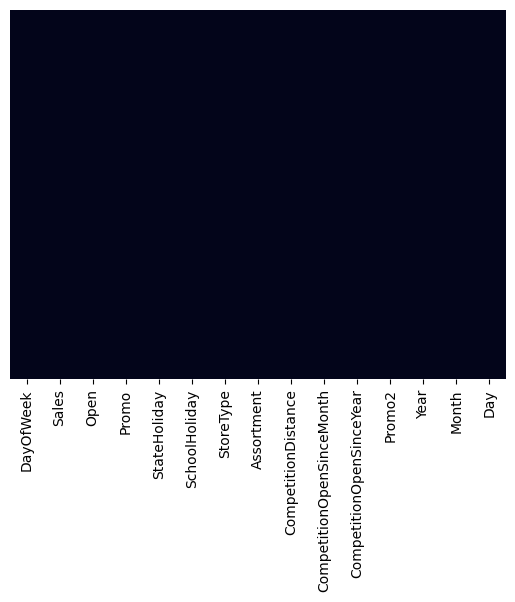

In [22]:
sns.heatmap(df3.isnull(),yticklabels= False, cbar= False)

### Converting object type features to integers

In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   DayOfWeek                  1017209 non-null  int64  
 1   Sales                      1017209 non-null  int64  
 2   Open                       1017209 non-null  int64  
 3   Promo                      1017209 non-null  int64  
 4   StateHoliday               1017209 non-null  object 
 5   SchoolHoliday              1017209 non-null  int64  
 6   StoreType                  1017209 non-null  object 
 7   Assortment                 1017209 non-null  object 
 8   CompetitionDistance        1017209 non-null  float64
 9   CompetitionOpenSinceMonth  1017209 non-null  float64
 10  CompetitionOpenSinceYear   1017209 non-null  float64
 11  Promo2                     1017209 non-null  int64  
 12  Year                       1017209 non-null  int64  
 13  Month       

In [24]:
df4 = pd.get_dummies(df3,drop_first= True)

In [25]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   DayOfWeek                  1017209 non-null  int64  
 1   Sales                      1017209 non-null  int64  
 2   Open                       1017209 non-null  int64  
 3   Promo                      1017209 non-null  int64  
 4   SchoolHoliday              1017209 non-null  int64  
 5   CompetitionDistance        1017209 non-null  float64
 6   CompetitionOpenSinceMonth  1017209 non-null  float64
 7   CompetitionOpenSinceYear   1017209 non-null  float64
 8   Promo2                     1017209 non-null  int64  
 9   Year                       1017209 non-null  int64  
 10  Month                      1017209 non-null  int64  
 11  Day                        1017209 non-null  int64  
 12  StateHoliday_0             1017209 non-null  uint8  
 13  StateHoliday

In [26]:
df4.columns.drop('Sales')

Index(['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Year', 'Month', 'Day', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c'],
      dtype='object')

### Making the training set and the testing set

In [27]:
X = df4[df4.columns.drop('Sales')] 
y = df4['Sales']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
ss = StandardScaler()

In [30]:
pt = PowerTransformer(method = 'yeo-johnson')

In [31]:
Scaled_features = ss.fit_transform(pt.fit_transform(X_train))

In [32]:
X_train = pd.DataFrame(data = Scaled_features, columns = X_train.columns)

In [33]:
lr = LinearRegression() 

In [34]:
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = lr.predict( pd.DataFrame(data = ss.transform(pt.fit_transform(X_test)), columns = X_test.columns))

In [36]:
RMSE = mse(y_test, y_pred)**0.5
print("RMSE ----- > ",RMSE)

RMSE ----- >  2510.849185318734


In [37]:
r2 = r2_score(y_test, y_pred)
print('r2 score LR model is --- >', r2)

r2 score LR model is --- > 0.5732813797695269


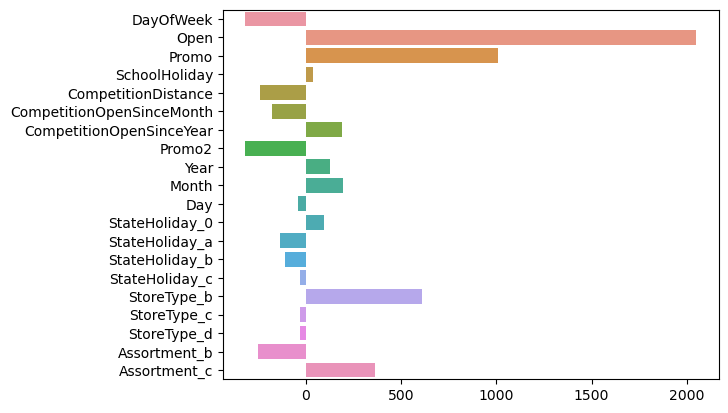

In [38]:
sns.barplot(x=lr.coef_,y=lr.feature_names_in_);